#### Animation of fields

I've added an appropriate colorbar, you can read the explanation at this link: https://joseph-long.com/writing/colorbars/, I also added saving option. Now, if you want to save it as a .gif file just delete '#' symol in corresponding line.

In [65]:
def return_parameters(parameters_file : str):
    with open(parameters_file, 'r') as f:
        TIME_dt_DTS = f.readline().split(' ')
        TIME = (int)(TIME_dt_DTS[0])
        dt = (float)(TIME_dt_DTS[1])
        DTS = (int)(TIME_dt_DTS[2])
        SIZE = f.readline().split(' ')
        SIZE_X = (int)(SIZE[0])
        SIZE_Y = (int)(SIZE[1])
        return TIME, dt, DTS, SIZE_X, SIZE_Y

In [66]:
#TODO: itertools.islice(...)

def set_field_frame(t : int, field : list, field_to_read : str):
    field.clear()
    with open(field_to_read, 'r') as f:
        next(f)
        next(f)
        for n in range(t):
            next(f) 
            continue
        
        temp = f.readline() 
        temp = temp.split('\t')[:-1]
        for X in range(len(temp)) :
            field.append(list(map(float, temp[X].split(' ')[:-1])))

In [67]:
import matplotlib.pyplot as plt


def set_imshow(subplot, Field: list, cmap_: str, v : tuple, SIZE_X : int, SIZE_Y : int):
    return subplot.imshow(
        Field,
        cmap = plt.get_cmap(cmap_),
        interpolation="gaussian",
        animated=True,
        origin='lower',
        extent=(0,SIZE_X,0,SIZE_Y),
        vmin=v[0], vmax=v[1],
    )

In [68]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import numpy as np

def set_colorbar(mappable):
    last_axes = plt.gca()
    ax = mappable.axes
    fig = ax.figure
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="3%", pad=0.05)
    cbar = fig.colorbar(mappable,
                       orientation="vertical",
                       cax=cax)
    plt.sca(last_axes)
    return cbar

In [69]:
import matplotlib.pyplot as plt

def set_whole_ax(axes, cbars : list, ddata_name : list, ddata_enum : dict, SIZE_X, SIZE_Y):
    axes[ ddata_name[ddata_enum['axes_position']] ].set_title( ddata_name[ ddata_enum['axes_name'] ], fontsize=20)
    im_ = set_imshow(axes[ ddata_name[ddata_enum['axes_position']] ],
                     ddata_name[ddata_enum['frame_data']],
                     ddata_name[ddata_enum['colormap']],
                     ddata_name[ddata_enum['vmin_vmax']],
                     SIZE_X, SIZE_Y)
    cbars.append(set_colorbar(im_))

In [70]:
def clear_whole_figure(axes, cbars, nrows, ncols):
    for i in range(nrows):
        for j in range(ncols):
            axes[i,j].cla()
    
    for i in range(len(cbars)):
        cbars[i].remove()

KeyboardInterrupt: 

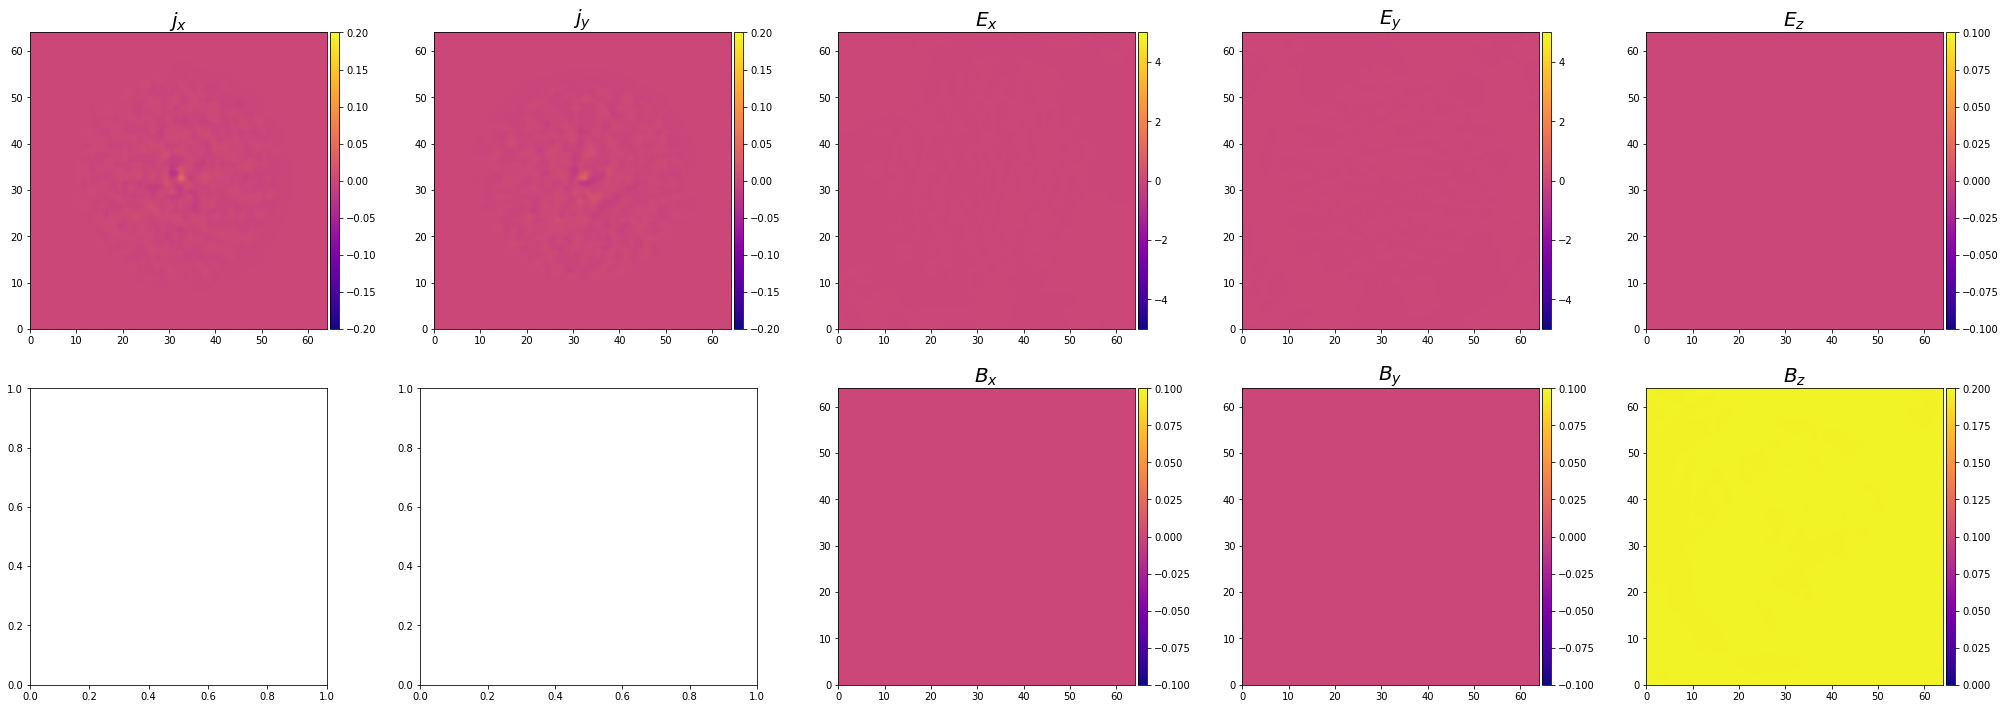

In [72]:
#TODO: python parallel for (☞ﾟヮﾟ)☞

parameters_file = "jx.txt"
TIME, dt, DTS, SIZE_X, SIZE_Y = return_parameters(parameters_file)

ddata = {
    
    #'name': ["file.txt", [frame_data], (axes_position), "axes_name", (vmin, vmax), "colormap"]
    'jx': [ "jx.txt", [], (0,0), "$j_x$", (-0.2, 0.2), "plasma" ],
    'jy': [ "jy.txt", [], (0,1), "$j_y$", (-0.2, 0.2), "plasma" ],
    'Ex': [ "Ex.txt", [], (0,2), "$E_x$", (-5, 5), "plasma" ],
    'Ey': [ "Ey.txt", [], (0,3), "$E_y$", (-5, 5), "plasma" ],
    'Ez': [ "Ez.txt", [], (0,4), "$E_z$", (0, 0), "plasma" ],
    'Bx': [ "Bx.txt", [], (1,2), "$B_x$", (0, 0), "plasma"],
    'By': [ "By.txt", [], (1,3), "$B_y$", (0, 0), "plasma"],
    'Bz': [ "Bz.txt", [], (1,4), "$B_z$", (0, 0.2), "plasma"],
    'ne': [ "../../Electrons/density/density.txt", [], (1,0), "$n_e$", (0, 10), "Greys"], 
    
    'off0': [ "", [], (1,1), "", (0,0), "" ],
}

ddata_enum = {
    
    'file_to_read': 0,
    'frame_data': 1,
    'axes_position': 2,
    'axes_name': 3,
    'vmin_vmax': 4,
    'colormap': 5,

}

nrows = 2
ncols = 5

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(35,12))

for t in range(0, int(TIME/DTS)-1):
    imshows = []
    cbars = []
    
    for name in ddata.keys():
        if (name[:3] != 'off'):
            set_field_frame(t, ddata[name][ddata_enum['frame_data']],
                               ddata[name][ddata_enum['file_to_read']])

            set_whole_ax(axes, cbars, ddata[name], ddata_enum, SIZE_X, SIZE_X)
    
        else:
            axes[ ddata[name][ddata_enum['axes_position']] ].axis("off")
        
    axes[1,1].text(0.35, 0.7, "%.2f $t\ {\cdot}\ w_p$" %(DTS*t*dt), transform=axes[1,1].transAxes, fontsize=20)

    fig.savefig("animation/%d.png" %t)
    
    clear_whole_figure(axes, cbars, nrows, ncols)